## Library Import

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression

#Libraries for Statistical Models
import statsmodels.api as sm


c

#Plotting
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

#Disable the warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv("KO.csv",index_col=0, parse_dates=True)
df.head(10)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-11,49.590000,50.009998,49.180000,49.540001,42.380154,18083600
2018-12-12,49.950001,50.020000,49.189999,49.220001,42.106411,12316900
2018-12-13,48.720001,49.610001,48.570000,49.470001,42.320271,13766200
2018-12-14,49.230000,49.520000,49.020000,49.340000,42.209057,13835900
2018-12-17,49.340000,49.529999,48.020000,48.330002,41.345036,18482700
2018-12-18,48.610001,48.830002,47.849998,48.320000,41.336479,14765700
2018-12-19,48.240002,48.759998,47.619999,47.900002,40.977184,17903800
2018-12-20,47.810001,48.130001,47.099998,47.540001,40.669201,21130000
2018-12-21,47.259998,48.750000,47.230000,47.570000,40.694874,32477700


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Descriptive Statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,55.166153,55.569618,54.725477,55.146733,51.100810,1.509015e+07
std,5.724007,5.717752,5.743530,5.748601,7.157598,6.789571e+06
min,38.759998,38.889999,36.270000,37.560001,33.440437,3.265500e+06
25%,50.510000,51.080002,50.099998,50.554999,45.275009,1.096470e+07
50%,54.860000,55.145001,54.460001,54.820000,50.569735,1.371025e+07
75%,60.200001,60.630001,59.747501,60.227500,58.050849,1.719055e+07
max,67.000000,67.199997,65.720001,66.209999,62.817841,6.784570e+07


In [ ]:
nasdaq =  pd.read_csv("^IXIC.csv",index_col=0, parse_dates=True)
sp500 =  pd.read_csv("^SPX.csv",index_col=0, parse_dates=True)
pep = pd.read_csv("PEP.csv",index_col=0, parse_dates=True)
mcd = pd.read_csv("MCD.csv",index_col=0, parse_dates=True)

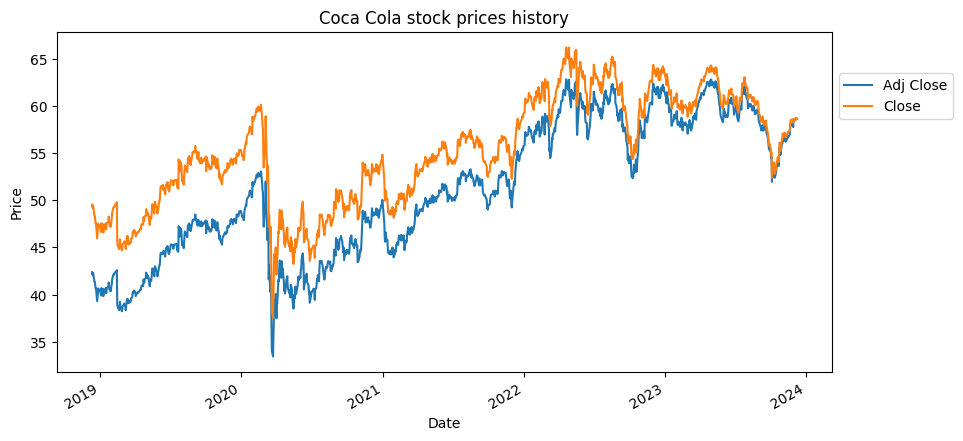

In [ ]:
df['Adj Close'].plot(figsize=(10,5))
df['Close'].plot()
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("Coca Cola stock prices history")
plt.legend(bbox_to_anchor=(1, 0.9), loc=2)
plt.show()

## SMA - Simple Moving Average
### Simple Moving Average, calculates the average of a range of stock (closing) prices over a specific number of periods in that range.

In [ ]:

df["Log_Return"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))

df["5d_sma"] = df["Log_Return"].rolling(5).mean().fillna(0)
df["10d_sma"] = df["Log_Return"].rolling(10).mean().fillna(0)
df["15d_sma"] = df["Log_Return"].rolling(15).mean().fillna(0)
df["30d_sma"] = df["Log_Return"].rolling(30).mean().fillna(0)
df["60d_sma"] = df["Log_Return"].rolling(60).mean().fillna(0)

# df["Diff5d_sma"] = df["Log_Return"] - df["5d_sma"]
# df["Diff10d_sma"] = df["Log_Return"] - df["10d_sma"]
# df["Diff15d_sma"] = df["Log_Return"] - df["15d_sma"]

df.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Return,5d_sma,10d_sma,15d_sma,30d_sma,60d_sma
Date,,,,,,,,,,,,
2018-12-11,49.590000,50.009998,49.180000,49.540001,42.380154,18083600,NaN,0.0,0.0,0.0,0.0,0.0
2018-12-12,49.950001,50.020000,49.189999,49.220001,42.106411,12316900,-0.006480,0.0,0.0,0.0,0.0,0.0
2018-12-13,48.720001,49.610001,48.570000,49.470001,42.320271,13766200,0.005066,0.0,0.0,0.0,0.0,0.0
2018-12-14,49.230000,49.520000,49.020000,49.340000,42.209057,13835900,-0.002631,0.0,0.0,0.0,0.0,0.0
2018-12-17,49.340000,49.529999,48.020000,48.330002,41.345036,18482700,-0.020682,0.0,0.0,0.0,0.0,0.0


## RSI - Relative Strength Index
### a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100

In [ ]:
df["RSI"] = np.array(100-(100/(1+df['High']/df['Low'])))

## Adding other stocks as features (5 Business Day Returns).


In [ ]:
return_period = 5

In [ ]:
df['sp_500'] = np.log(sp500['Adj Close']).diff(return_period)
df['pepsi'] = np.log(pep['Adj Close']).diff(return_period)
df['nasdaq'] = np.log(nasdaq['Adj Close']).diff(return_period)
df['mcd'] = np.log(mcd['Adj Close']).diff(return_period)

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Log_Return,5d_sma,10d_sma,15d_sma,30d_sma,60d_sma,RSI,sp_500,pepsi,nasdaq,mcd
Date,,,,,,,,,,,,,,,,,
2018-12-11,49.590000,50.009998,49.180000,49.540001,42.380154,18083600,NaN,0.000000,0.0,0.0,0.0,0.0,50.418388,NaN,NaN,NaN,NaN
2018-12-12,49.950001,50.020000,49.189999,49.220001,42.106411,12316900,-0.006480,0.000000,0.0,0.0,0.0,0.0,50.418305,NaN,NaN,NaN,NaN
2018-12-13,48.720001,49.610001,48.570000,49.470001,42.320271,13766200,0.005066,0.000000,0.0,0.0,0.0,0.0,50.529640,NaN,NaN,NaN,NaN
2018-12-14,49.230000,49.520000,49.020000,49.340000,42.209057,13835900,-0.002631,0.000000,0.0,0.0,0.0,0.0,50.253704,NaN,NaN,NaN,NaN
2018-12-17,49.340000,49.529999,48.020000,48.330002,41.345036,18482700,-0.020682,0.000000,0.0,0.0,0.0,0.0,50.773962,NaN,NaN,NaN,NaN
2018-12-18,48.610001,48.830002,47.849998,48.320000,41.336479,14765700,-0.000207,-0.004987,0.0,0.0,0.0,0.0,50.506829,-0.034972,-0.047580,-0.035893,-0.021361
2018-12-19,48.240002,48.759998,47.619999,47.900002,40.977184,17903800,-0.008730,-0.005437,0.0,0.0,0.0,0.0,50.591409,-0.055893,-0.061330,-0.067222,-0.023826
2018-12-20,47.810001,48.130001,47.099998,47.540001,40.669201,21130000,-0.007544,-0.007959,0.0,0.0,0.0,0.0,50.540798,-0.071590,-0.071259,-0.079744,-0.070841
2018-12-21,47.259998,48.750000,47.230000,47.570000,40.694874,32477700,0.000631,-0.007307,0.0,0.0,0.0,0.0,50.791832,-0.073122,-0.040566,-0.087293,-0.051153


## Adding MACD, Signal line and MACD histogram as features

In [ ]:
ema_short = df['Adj Close'].ewm(span=12, adjust=False).mean()
ema_long = df['Adj Close'].ewm(span=26, adjust=False).mean()
macd = ema_short - ema_long
df['macd'] = macd

signal_line = macd.ewm(span=9, adjust=False).mean()
macd_histogram = macd - signal_line

df['signal'] = signal_line
df['macd_hist'] = macd_histogram



## We set future return (5 business days) as the target.

In [ ]:
# target feature: a signal whether to buy or not we will train our model to predict this only
df['target'] = np.log(df['Adj Close']).diff(5).shift(-5)

In [ ]:
#remove all rows contain NaN values
# df = df.dropna()
# drop original columns
df = df.drop(['Open', 'High', 'Low', 'Close', 'Volume','Adj Close', 'Log_Return'], axis = 1)

In [ ]:
df.head(10)

,5d_sma,10d_sma,15d_sma,30d_sma,60d_sma,RSI,sp_500,pepsi,nasdaq,mcd,macd,signal,macd_hist,target
Date,,,,,,,,,,,,,,
2018-12-11,0.000000,0.0,0.0,0.0,0.0,50.418388,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.024935
2018-12-12,0.000000,0.0,0.0,0.0,0.0,50.418305,NaN,NaN,NaN,NaN,-0.021837,-0.004367,-0.017470,-0.027185
2018-12-13,0.000000,0.0,0.0,0.0,0.0,50.529640,NaN,NaN,NaN,NaN,-0.021637,-0.007821,-0.013816,-0.039795
2018-12-14,0.000000,0.0,0.0,0.0,0.0,50.253704,NaN,NaN,NaN,NaN,-0.030105,-0.012278,-0.017827,-0.036533
2018-12-17,0.000000,0.0,0.0,0.0,0.0,50.773962,NaN,NaN,NaN,NaN,-0.105322,-0.030887,-0.074435,-0.050281
2018-12-18,-0.004987,0.0,0.0,0.0,0.0,50.506829,-0.034972,-0.047580,-0.035893,-0.021361,-0.163734,-0.057456,-0.106278,-0.028976
2018-12-19,-0.005437,0.0,0.0,0.0,0.0,50.591409,-0.055893,-0.061330,-0.067222,-0.023826,-0.236295,-0.093224,-0.143071,-0.007754
2018-12-20,-0.007959,0.0,0.0,0.0,0.0,50.540798,-0.071590,-0.071259,-0.079744,-0.070841,-0.315020,-0.137583,-0.177437,-0.007177
2018-12-21,-0.007307,0.0,0.0,0.0,0.0,50.791832,-0.073122,-0.040566,-0.087293,-0.051153,-0.371062,-0.184279,-0.186783,-0.004635


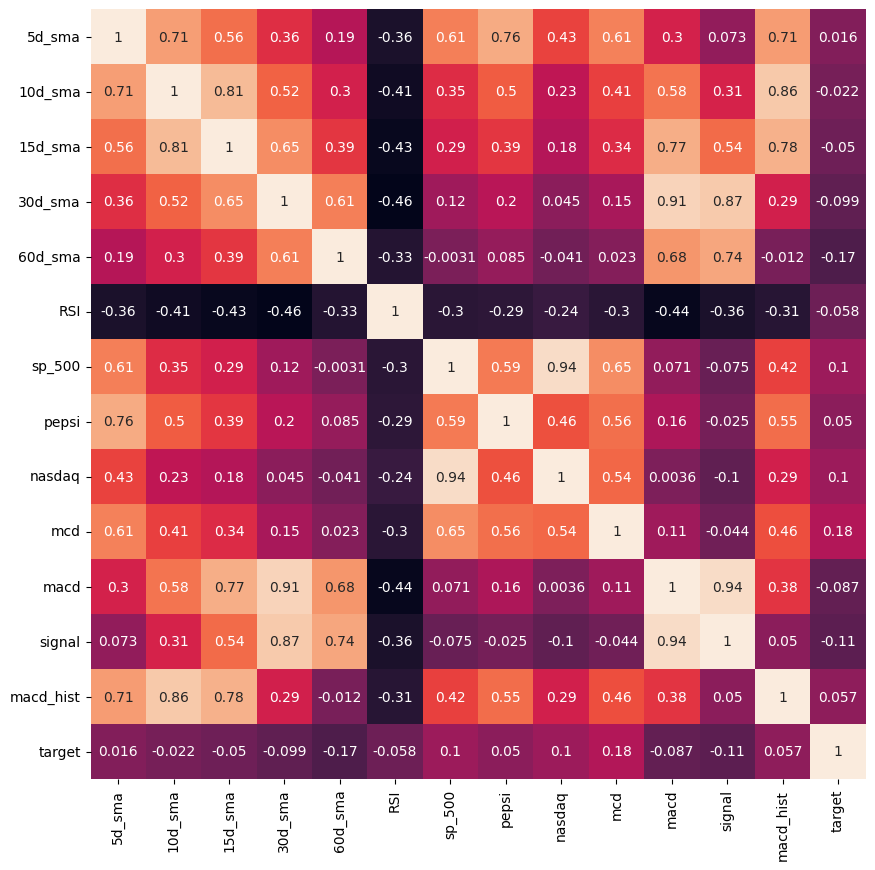

In [ ]:
# Feature correlation
plt.figure(figsize=(10, 10))
# sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

observe high correlation (> 0.8) between 'macd' and 'signal', '10d_sma' and 'macd_hist', '10d_sma' and '30d_sma', ‘signal' and '30d_sma', '5d_sma' and '15d_sma'. Therefore remove 'macd' , '30d_sma' ,'5d_sma' and 'signal'.

In [ ]:
df = df.drop(['10d_sma', 'macd', 'signal','5d_sma'], axis = 1)

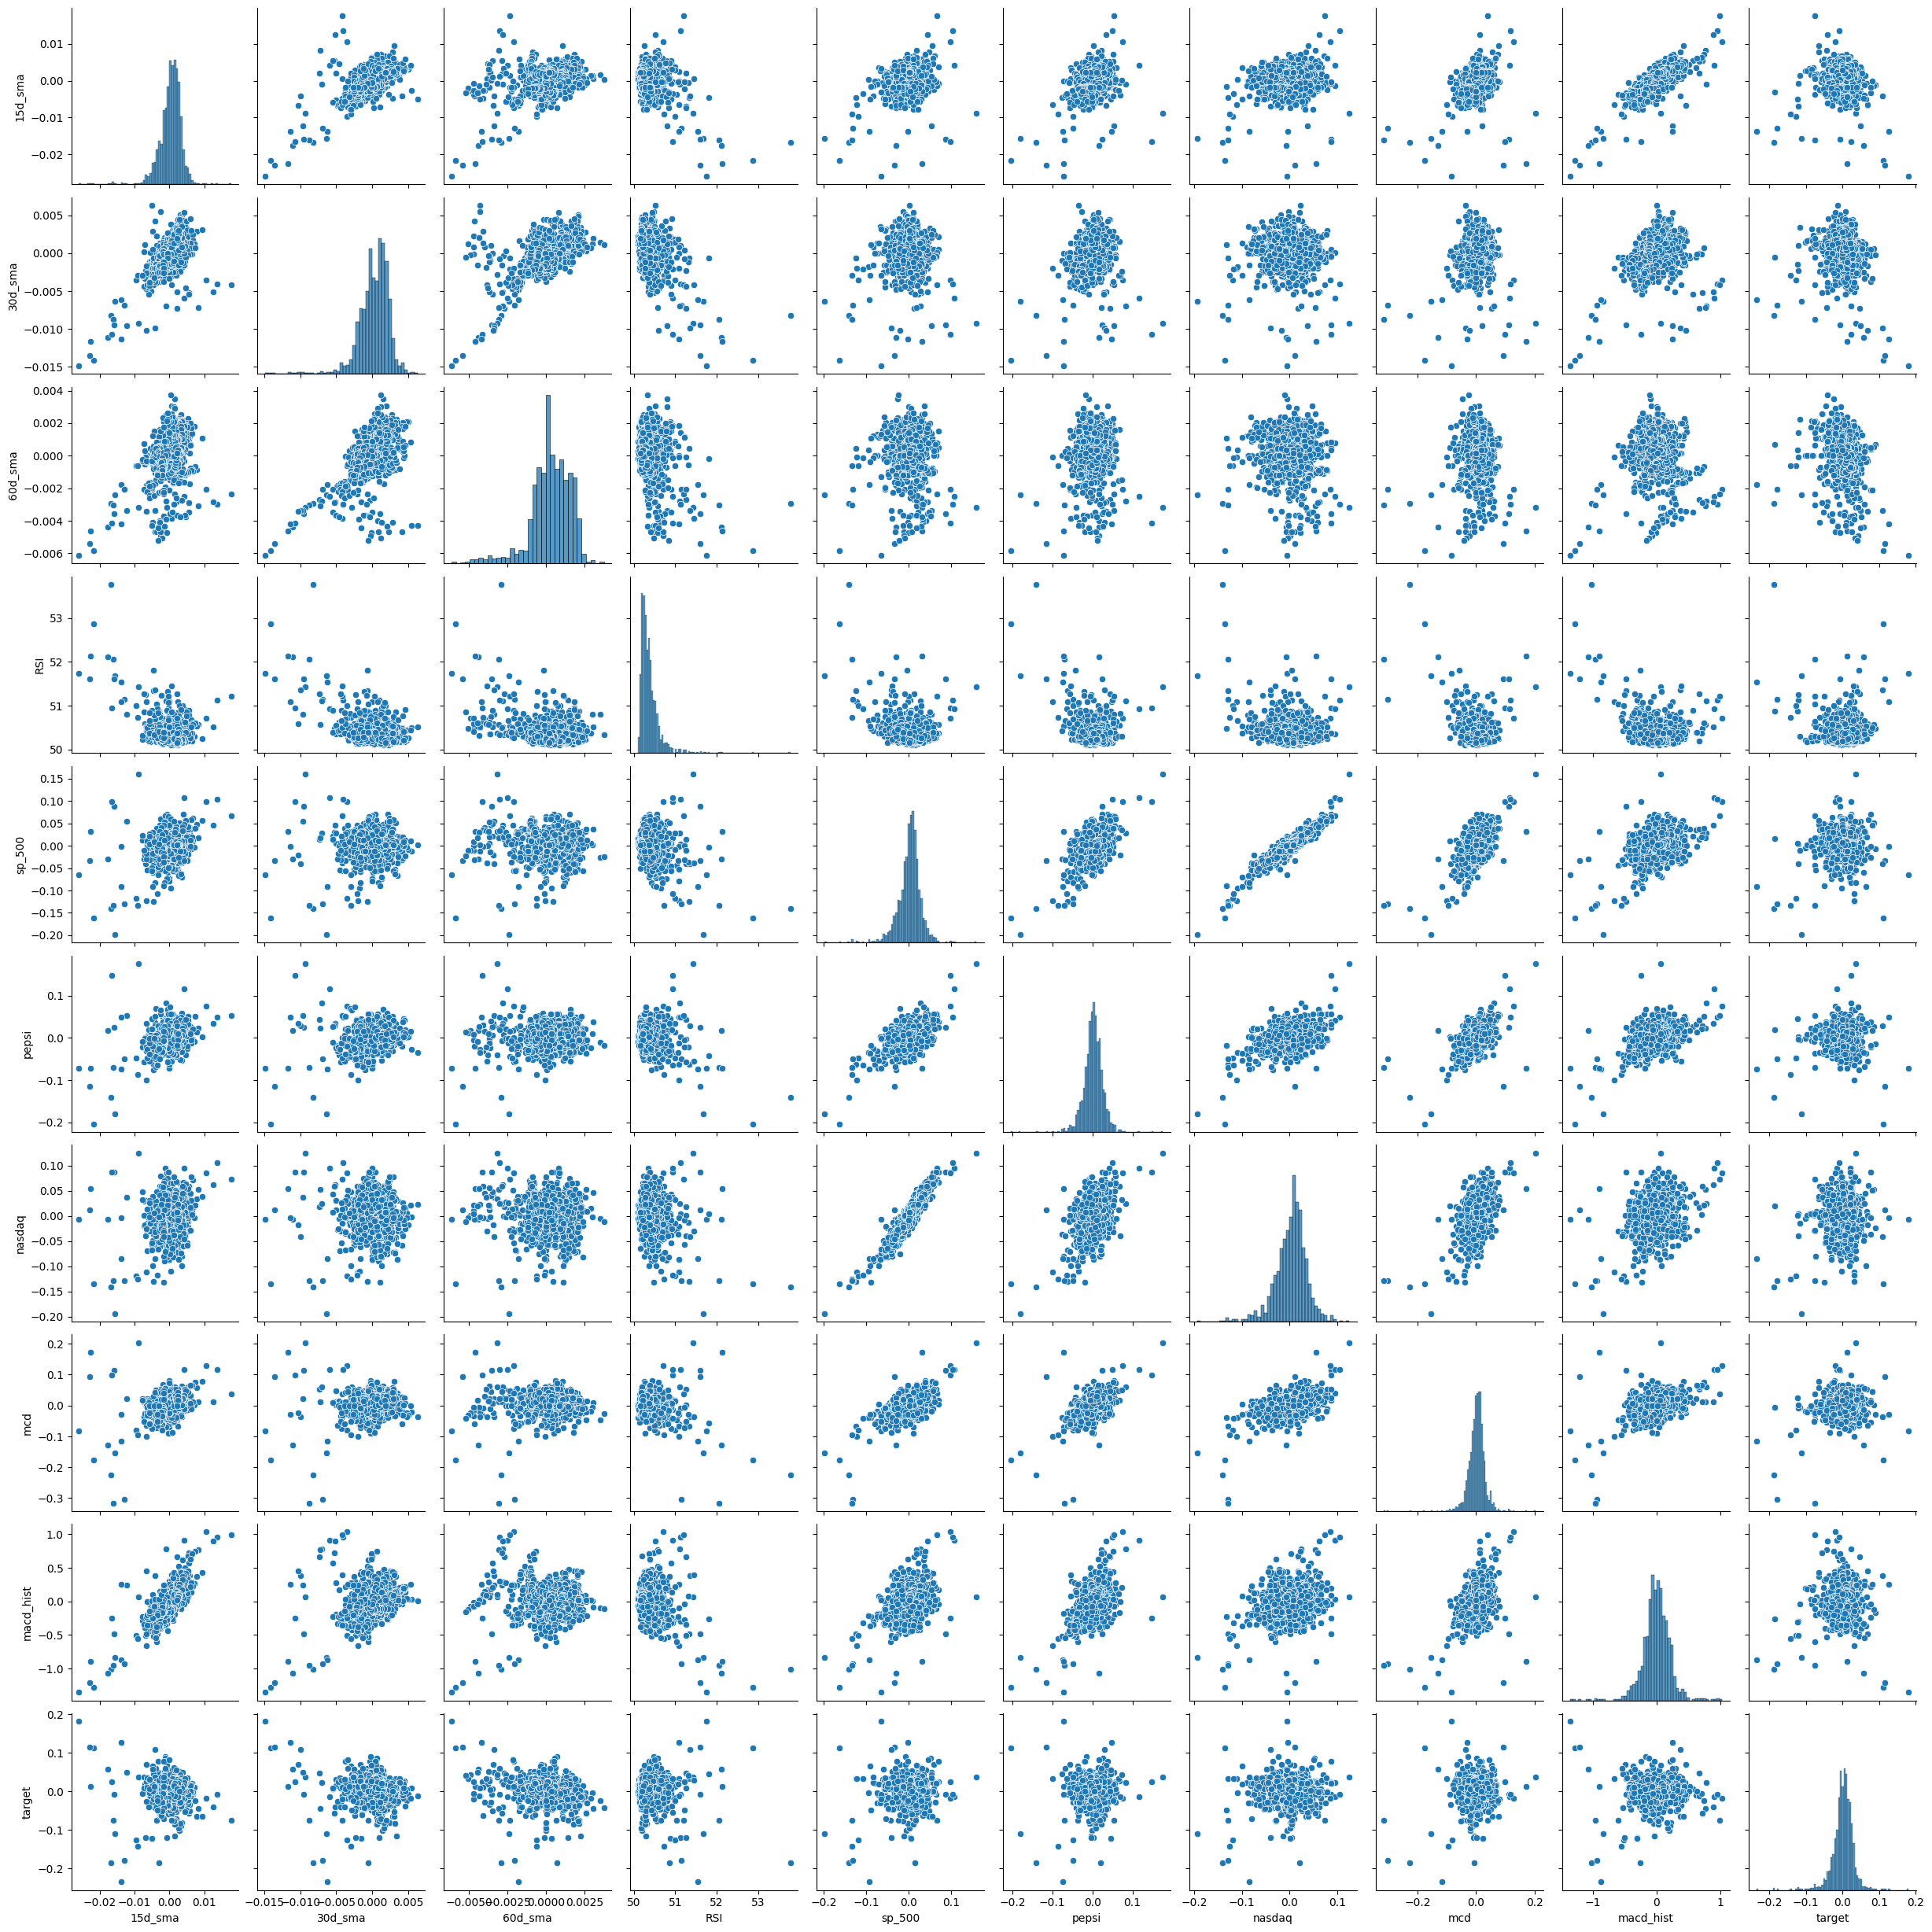

In [ ]:
sns.pairplot(df)

In [ ]:
# df[["5d_sma","10d_sma","15d_sma","Adj Close"]].plot(title="KO Close price vs sma")
# plt.legend(bbox_to_anchor=(1, 0.9), loc=2)
# plt.show()

## Feature Selection

In [ ]:
df = df.dropna()

In [ ]:
Y = df['target']
X = df.iloc[:, :-1]

bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['feature','Score']
 #print 9 best features
featureScores.nlargest(9,'Score').set_index('feature')

,Score
feature,
mcd,40.666032
60d_sma,36.044305
sp_500,13.437026
nasdaq,13.232357
30d_sma,12.591113
macd_hist,3.989962
RSI,3.889870
15d_sma,3.200847
pepsi,3.103714


## Spliting data into training and testing sets and apply standardization.

In [ ]:
X = df.drop('target', axis=1)  # features
y = df['target']  # target variable
# split training and testing in 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [ ]:
# LR Model Train
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction
linear_predict = linear_model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, linear_predict)
print('Linear Regression Model Mean Squared Error: %.6f' % mse)

Linear Regression Model Mean Squared Error: 0.001130


In [ ]:
### Cross Validation

# Number of folds
cv_folds = 5

cv_scores = cross_val_score(linear_model, X_train, y_train, cv=cv_folds, scoring='neg_mean_squared_error')

print('Average Cross-Validation Mean Squared Error: %.6f' % abs(cv_scores.mean()))

Average Cross-Validation Mean Squared Error: 0.000801


In [ ]:
### Grid Search

param_grid = {}
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=cv_folds, scoring='neg_mean_squared_error', refit=True)
grid_search.fit(X_train, y_train)

# best model
best_linear_model = grid_search.best_estimator_

# Prediction
linear_predict_best = best_linear_model.predict(X_test)

# Mean Squared Error Evaluation
mse_best = mean_squared_error(y_test, linear_predict_best)
print('Best Linear Regression Model Mean Squared Error: %.6f' % mse_best)

Best Linear Regression Model Mean Squared Error: 0.001130


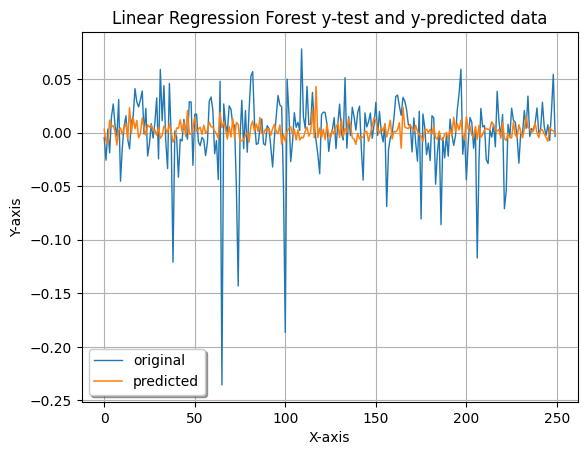

In [ ]:
# Plot

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, linear_predict_best, linewidth=1.1, label="predicted")
plt.title("Linear Regression Forest y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Random Forest

In [ ]:
# Number of trees
n_estimators = [50,100,150,200]

# Max number of features considered for splitting a node
max_features = ['auto', 'sqrt']

# Minimum number of samples at each leaf node
min_samples_leaf = [5, 10, 20]

# Mininum number of data points placed in a node before the node is split
min_samples_split = [2, 5, 10]

# Max number of levels in each decision tree
max_depth = [15, 30, 45]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split':min_samples_split,
               'max_depth': max_depth,
               'bootstrap':bootstrap}

# Create the model
rf = RandomForestRegressor()

rf_random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_search.fit(X_train, y_train)

# print the best parameters
print ('Best_Parameters: ', rf_random_search.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best_Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 45, 'bootstrap': False}  



In [ ]:
# Feed the data into the best model
rf_best = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 5, max_features = 'sqrt', min_samples_split = 10, max_depth = 30)
rf_best.fit(X_train, y_train)
rf_pred_train = rf_best.predict(X_train)
rf_pred_test = rf_best.predict(X_test)

In [ ]:
# Check the feature importance
importances = rf_best.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
  print(f" The importance of feature '{columns[i]}' is {round(importances[i] * 100,2)}%")
  i += 1

 The importance of feature '15d_sma' is 11.56%
 The importance of feature '30d_sma' is 16.12%
 The importance of feature '60d_sma' is 13.24%
 The importance of feature 'RSI' is 11.67%
 The importance of feature 'sp_500' is 9.0%
 The importance of feature 'pepsi' is 7.52%
 The importance of feature 'nasdaq' is 8.16%
 The importance of feature 'mcd' is 9.72%
 The importance of feature 'macd_hist' is 13.01%


In [ ]:
rf_mse = mean_squared_error(y_test, rf_pred_test)
rf_r2 = r2_score(y_test,rf_pred_test)
print("Random Forest MSE: ", rf_mse)
print("Random Forest RMSE: ", rf_mse**(1/2.0))
# print("Random Forest R2: ", rf_r2)

Random Forest MSE:  0.0008979268494297745
Random Forest RMSE:  0.029965427569613862


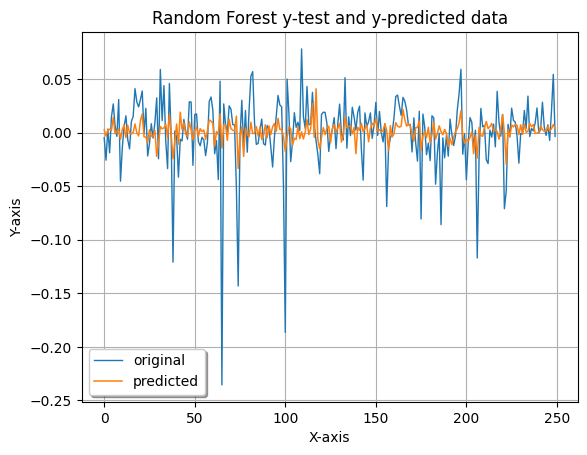

In [ ]:
# Plot the original and predicted data
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, rf_pred_test, linewidth=1.1, label="predicted")
plt.title("Random Forest y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## LSTM

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras


In [ ]:

# from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Function to create dataset with look back
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), :-1]
        X.append(a)
        Y.append(data[i + look_back, -1])
    return np.array(X), np.array(Y)

# Split data into training and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]


def create_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 9)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Manual search over the look-back range
look_back_range = [2,5,10,15,20,25,30]
best_score = float('inf')
best_look_back = None


for look_back in look_back_range:

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    model = create_model(look_back)
    model.fit(trainX, trainY, epochs=30, batch_size=30, verbose=0)

    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # Calculate root mean squared error
    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
    testScore = np.sqrt(mean_squared_error(testY, testPredict[:, 0]))

    print(f'Look-back period: {look_back} - Train RMSE Score: {trainScore} , Test RMSE Score: {testScore}')

    # Update best score and look_back
    if testScore < best_score:
        best_score = testScore
        best_look_back = look_back

print(f'Best Look-back: {best_look_back} with Test Score: {best_score} RMSE')


8/8 [==============================] - 0s 2ms/step
Look-back period: 2 - Train RMSE Score: 1.0694206785312241 , Test RMSE Score: 0.6151051186072634
8/8 [==============================] - 0s 3ms/step
Look-back period: 5 - Train RMSE Score: 1.0744930453918062 , Test RMSE Score: 0.6142688936301661
8/8 [==============================] - 0s 3ms/step
Look-back period: 10 - Train RMSE Score: 1.0792767608841396 , Test RMSE Score: 0.6199427918929467
8/8 [==============================] - 0s 3ms/step
Look-back period: 15 - Train RMSE Score: 1.0841205750662133 , Test RMSE Score: 0.6240148245540427
8/8 [==============================] - 0s 4ms/step
Look-back period: 20 - Train RMSE Score: 1.0849751599374133 , Test RMSE Score: 0.6201926944107712
7/7 [==============================] - 0s 5ms/step
Look-back period: 25 - Train RMSE Score: 1.0877552120482468 , Test RMSE Score: 0.6156964417327185
7/7 [==============================] - 0s 5ms/step
Look-back period: 30 - Train RMSE Score: 1.08810666315705

In [ ]:
pip install --upgrade tensorflow keras

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
# fit the model using 30 days as look_back period and tune hyperparameters

look_back = 30
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)


In [ ]:
pip install keras tensorflow scikit-optimize


In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import BayesianOptimization

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(units=hp.Int('units_' + str(i), min_value=20, max_value=200, step=15),
                       activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid']),
                       return_sequences=True if i < hp.get('num_layers') - 1 else False,
                       input_shape=(30, 9)))

    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd']),
                  loss='mean_squared_error',  metrics=['mean_squared_error'])
    return model

# Bayesian Optimization tuner
tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_opt'
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the optimal hyperparameters


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


print("Best hyperparameters found:")
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")


model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))


val_loss = model.evaluate(X_test, y_test)[0]
print(f"Validation MSE of the best model: {val_loss}")





Reloading Tuner from my_dir/lstm_opt/tuner0.json
Best hyperparameters found:
num_layers: 3
units_0: 65
activation_0: tanh
optimizer: adam
units_1: 35
activation_1: tanh
units_2: 185
activation_2: sigmoid
7/7 [==============================] - 0s 22ms/step - loss: 0.3614 - mean_squared_error: 0.3614
Validation MSE of the best model: 0.3613569438457489


In [ ]:
print(f"Validation RMSE of the best model: {np.sqrt(val_loss)}")

Validation RMSE of the best model: 0.5810292470796234


In [ ]:
y_pred = model.predict(X_test)


7/7 [==============================] - 1s 29ms/step


In [ ]:
y_pred.shape

(219, 1)

In [ ]:
y_test.shape

(219,)

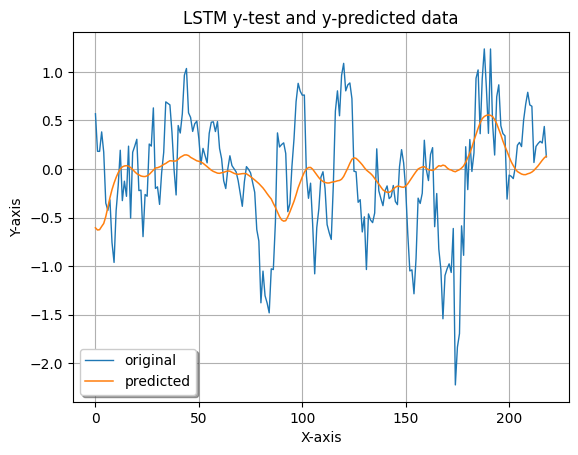

In [ ]:
# Plot
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("LSTM y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
df.shape

(1248, 10)

## White Reality Check

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
#seaborn.mpl.rcParams['savefig.dpi'] = 90
'''
https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html
This subroutine will calculate White's Reality Check for a single trading rule
in accordance with Aronson's Evidence Based Technical Analysis p.237ff

'''


#returns must be detrended by subtracting the average daily return of the benchmark
def bootstrap(ser):
    ser.dropna(inplace=True)
    arr = np.array(ser.values)
    alpha = .05*100 #significance alpha
    reps = 5000 #how many bootstrapings, 50000 limit if you have 8GB RAM

    percentile = 100-alpha
    ave = np.average(arr) #arithmetic mean

    print("average return %f" %ave)

    #ave = ms.gmean(arr) #geometric mean

    centered_arr = arr-ave
    n = len(centered_arr)
    #constructs 50000 alternative return histories and calculates their theoretical averages
    xb = np.random.choice(centered_arr, (n, reps), replace=True)
    mb = xb.mean(axis=0) #arithmetic mean
    #mb = ms.gmean(mb, axis=0) #geometric mean

    #sorts the 50000 averages
    mb.sort()
    #calculates the 95% conficence interval (two tails) threshold for the theoretical averages
    print(np.percentile(mb, [2.5, 97.5]))
    threshold = np.percentile(mb, [percentile])[0]


    if ave > threshold:
        print("Reject Ho = There is statistically significant difference between the population distribution mean yields of the actual data and the predicted data using this method (because p_value is small enough)")
    else:
        print("Do not reject Ho = The population distribution mean yields of predicted values and the actual values are not statistically different (because p_value is not small enough)")

    #count will be the items i that are smaller than ave
    count_vals = 0
    for i in mb:
        count_vals += 1
        if i > ave:
            break

    #p is based on the count that are larger than ave so 1-count is needed:
    p = 1-count_vals/len(mb)

    print("p_value:")
    print(p)



    #histogram
    sr = pd.Series(mb)
    desc = sr.describe()
    count = desc[0]
    std = desc[2]
    minim = desc[3]
    maxim = desc[7]
    R = maxim-minim
    n = count
    s = std
    bins = int(round(R*(n**(1/3))/(3.49*std),0))
    fig = sr.hist(bins=bins)
   # plt.show()


    #about the histogram
    #https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram
    #R(n^(1/3))/(3.49σ)
    #R is the range of data (in your case R = 3-(-3)= 6),
    #n is the number of samples,
    #σ is your standard deviation.


average return 0.001624
[-0.00393914  0.00441915]
Do not reject Ho = The population distribution mean yields of predicted values and the actual values are not statistically different (because p_value is not small enough)
p_value:
0.22699999999999998


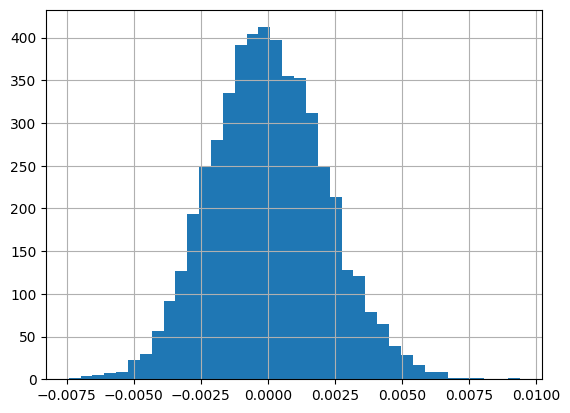

In [ ]:
#white reality check for Linear Regression Model Results

bootstrap(linear_predict_best - y_test)

average return 0.001141
[-0.00359813  0.00380824]
Do not reject Ho = The population distribution mean yields of predicted values and the actual values are not statistically different (because p_value is not small enough)
p_value:
0.265


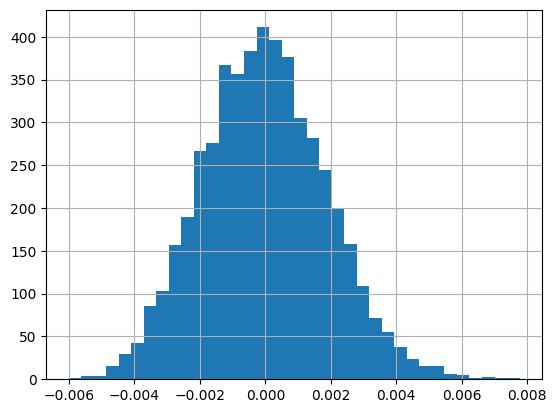

In [ ]:
#white reality check for Random Forest Model Results

bootstrap(rf_pred_test - y_test)